In [1]:
# import libraries
import librosa
import numpy as np
import musicnn
from musicnn.extractor import extractor
import matplotlib.pyplot as plt
import tqdm as tqdm

In [58]:
 # Create templates for major, minor, and no-chord qualities
maj_template = np.array([1,0,0, 0,1,0, 0,1,0, 0,0,0])
min_template = np.array([1,0,0, 1,0,0, 0,1,0, 0,0,0])
N_template   = np.array([1,1,1, 1,1,1, 1,1,1, 1,1,1.]) / 4.
    
labels = ['C', 'C#', 'D', 'D#', 'E', 'F',
            'F#', 'G', 'G#', 'A', 'A#', 'B',
            'Cm', 'C#m', 'Dm', 'D#m', 'Em', 'Fm',
            'F#m', 'Gm', 'G#m', 'Am', 'A#m', 'Bm',
            'N']

In [3]:
import os

def getTriadSequence(dir_path):
    # folder path
    
    # list to store files
    tracks = []

    # Iterate directory
    for path in os.listdir(dir_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, path)):
            tracks.append(path)

    for t in tracks:
        if t == '.DS_Store':
            tracks.remove(t)
            
    tracks.sort()
    print('Total # of files:',  len(tracks))
    
    # Generate the weighting matrix that maps chroma to labels
    weights = np.zeros((25, 12), dtype=float)
    
    for c in range(12):
        weights[c, :] = np.roll(maj_template, c) # c:maj
        weights[c + 12, :] = np.roll(min_template, c)  # c:min
    weights[-1] = N_template  # the last row is the no-chord class
    # Make a self-loop transition matrix over 25 states
    trans = librosa.sequence.transition_loop(25, 0.99) 
    
    #get the triads for each song
    all_chords_RollingStones = []

    for t in tracks:
        song = dir_path + '/' + t
        print('processing song: ', t)
        y, sr = librosa.load(song)
        # Suppress percussive elements
        y = librosa.effects.harmonic(y, margin=4)
        chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
        # Map chroma (observations) to class (state) likelihoods
        probs = np.exp(weights.dot(chroma))  # P[class | chroma] ~= exp(template' chroma)
        probs /= probs.sum(axis=0, keepdims=True)  # probabilities must sum to 1 in each column
        # Compute independent frame-wise estimates
        #chords_ind = np.argmax(probs, axis=0)
        # And viterbi estimates
        chords_vit = librosa.sequence.viterbi_discriminative(probs, trans)
        all_chords_RollingStones.append(chords_vit)
    
    return all_chords_RollingStones, tracks

In [4]:
path = '../audio/RS500'
all_rs500_triads, tracks = getTriadSequence(path)

Total # of files: 500
processing song:  01 - Bob Dylan - Like A Rolling Stone.mp3
processing song:  02 - Rolling Stones - (I Can't Get No) Satisfaction.mp3


[src/libmpg123/layer3.c:INT123_do_layer3():1841] error: dequantization failed!


processing song:  03 - John Lennon - Imagine.mp3
processing song:  04 - Marvin Gaye - Whats Going On.mp3
processing song:  05 - Aretha Franklin - Respect.mp3
processing song:  06 - The Beach Boys - Good Vibrations.mp3
processing song:  07 - Chuck Berry - Johnny B. Goode.mp3
processing song:  08 - The Beatles - Hey Jude.mp3
processing song:  09 - Nirvana - Smells Like Teen Spirit.mp3
processing song:  10 - Ray Charles - What'd I Say Parts I & Ii.mp3
processing song:  100 - The Rolling Stones - You Can't Always Get What You Want.mp3
processing song:  101 - The Jimi Hendrix Experience - Voodoo Child (Slight Return).mp3
processing song:  102 - Gene Vincent - Be Bop A Lula.mp3
processing song:  103 - Donna Summer - Hot Stuff.mp3
processing song:  104 - Stevie Wonder - Living For The City.mp3
processing song:  105 - Simon & Garfunkel - The Boxer.mp3
processing song:  106 - Bob Dylan - Mr. Tambourine Man.mp3
processing song:  107 - Buddy Holly And The Crickets - Not Fade Away.mp3
processing s

/var/folders/k2/flh0b7xj6mv_tf6gpxphqm9m0000gn/T/ipykernel_44068/2558872899.py:38: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(song)
/Users/david/miniforge3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


processing song:  109 - Van Morrison - Brown Eyed Girl.mp3
processing song:  11 - The Who - My Generation.mp3
processing song:  110 - Otis Redding - I've Been Loving You Too Long.mp3
processing song:  111 - Hank Williams - I'm So Lonesome I Could Cry.mp3
processing song:  112 - Elvis Presley - That's All Right.mp3
processing song:  113 - The Drifters - Up On The Roof.mp3
processing song:  114 - The Crystals - Da Doo Ron Ron (When He Walked Me Home).mp3
processing song:  115 - Sam Cooke - You Send Me.mp3
processing song:  116 - The Rolling Stones - Honky Tonk Woman.mp3
processing song:  117 - Al Green - Take Me To The River.mp3
processing song:  118 - Isley Brothers - Shout (Parts 1 And 2).mp3
processing song:  119 - Fleetwood Mac - Go Your Own Way.mp3
processing song:  12 - Sam Cooke - A Change Is Gonna Come.mp3
processing song:  120 - The Jackson 5 - I Want You Back.mp3
processing song:  121 - Ben E. King - Stand By Me.mp3
processing song:  122 - The Animals - House Of The Rising Sun.

Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 4372544.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  127 - David Bowie - Changes.mp3
processing song:  128 - Chuck Berry - Rock And Roll Music.mp3
processing song:  129 - Steppenwolf - Born To Be Wild.mp3
processing song:  13 - The Beatles - Yesterday.mp3
processing song:  130 - Rod Stewart - Maggie May.mp3
processing song:  131 - U2 - With Or Without You.mp3
processing song:  132 - Bo Diddley - Who Do You Love.mp3
processing song:  133 - The Who - Wont Get Fooled Again.mp3
processing song:  134 - Wilson Pickett - In The Midnight Hour.mp3
processing song:  135 - The Beatles - While My Guitar Gently Weeps.mp3
processing song:  136 - Elton John - Your Song.mp3
processing song:  137 - The Beatles - Eleanor Rigby.mp3
processing song:  138 - Sly & The Family Stone - Family Affair.mp3
processing song:  139 - The Beatles - I Saw Her Standing There.mp3
processing song:  14 - Bob Dylan - Blowin' In The Wind.mp3
processing song:  140 - Led Zeppelin - Kashmir.mp3
processing song:  141 - The Everly Brothers - All I Have To Do Is Dr

Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 3561358.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  142 - James Brown - Please Please Please.mp3
processing song:  143 - Prince - Purple Rain.mp3
processing song:  144 - The Ramones - I Wanna Be Sedated.mp3
processing song:  145 - Sly & The Family Stone - Everyday People.mp3
processing song:  146 - The B-52's - Rock Lobster.mp3
processing song:  147 - Iggy Pop - Lust For Life.mp3
processing song:  148 - Janis Joplin - Me And Bobby Mcgee.mp3
processing song:  149 - The Everly Brothers - Cathy's Clown.mp3


Note: Illegal Audio-MPEG-Header 0x20202020 at offset 3601707.
Note: Trying to resync...
Note: Skipped 1024 bytes in input.
[src/libmpg123/parse.c:wetwork():1365] error: Giving up resync after 1024 bytes - your stream is not nice... (maybe increasing resync limit could help).


processing song:  15 - Clash - London Calling.mp3
processing song:  150 - The Byrds - Eight Miles High.mp3
processing song:  151 - The Penguins - Earth Angel.mp3


Note: Illegal Audio-MPEG-Header 0x0000000c at offset 4377509.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  152 - Jimi Hendrix - Foxey Lady.mp3
processing song:  153 - The Beatles - A Hard Days Night.mp3
processing song:  154 - Buddy Holly - Rave On.mp3
processing song:  155 - Creedence Clearwater Revival - Proud Mary.mp3
processing song:  156 - Simon & Garfunkel - The Sounds Of Silence.mp3
processing song:  157 - The Flamingos - I Only Have Eyes For You.mp3
processing song:  158 - Bill Haley And His Comets - Rock Around The Clock.mp3
processing song:  159 - The Velvet Underground - I'm Waiting For The Man.mp3
processing song:  16 - The Beatles - I Want To Hold Your Hand.mp3
processing song:  160 - Public Enemy - Bring The Noise.mp3


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 5440824.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  161 - Ray Charles - I Can't Stop Loving You.mp3
processing song:  162 - Sinead O'connor - Nothing Compares 2 U.mp3
processing song:  163 - Queen - Bohemian Rhapsody.mp3
processing song:  164 - Johnny Cash - Folsom Prison Blues.mp3


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 4050285.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  165 - Tracy Chapman - Fast Car.mp3
processing song:  166 - Eminem - Lose Yourself.mp3
processing song:  167 - Marvin Gaye - Lets Get It On.mp3
processing song:  168 - The Temptations - Papa Was A Rollin' Stone.mp3
processing song:  169 - R.E.M. - Losing My Religion.mp3
processing song:  17 - Jimi Hendrix - Purple Haze.mp3
processing song:  170 - Joni Mitchell - Both Sides Now.mp3
processing song:  171 - Abba - Dancing Queen.mp3
processing song:  172 - Aerosmith - Dream On.mp3


Note: Illegal Audio-MPEG-Header 0x204f6e00 at offset 6439545.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  173 - The Sex Pistols - God Save The Queen.mp3
processing song:  174 - The Rolling Stones - Paint It Black.mp3
processing song:  175 - Bobby Fuller Four - I Fought The Law.mp3
processing song:  176 - The Beach Boys - Don't Worry Baby.mp3
processing song:  177 - Tom Petty - Free Fallin'.mp3
processing song:  178 - Big Star - September Gurls.mp3
processing song:  179 - Joy Division - Love Will Tear Us Apart.mp3
processing song:  18 - Chuck Berry - Maybellene.mp3
processing song:  180 - OutKast - Hey Ya.mp3
processing song:  181 - Booker T. & The M.G.S - Green Onions.mp3
processing song:  182 - The Drifters - Save The Last Dance For Me.mp3


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 4445687.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  183 - B.B. King - The Thrill Is Gone.mp3
processing song:  184 - The Beatles - Please Please Me.mp3
processing song:  185 - Bob Dylan - Desolation Row.mp3
processing song:  186 - Aretha Franklin - I Never Loved A Man (The Way I Love You).mp3
processing song:  187 - Ac Dc - Back In Black.mp3
processing song:  188 - Creedence Clearwater Revival - Who'll Stop The Rain.mp3
processing song:  189 - The Bee Gees - Stayin Alive.mp3
processing song:  19 - Elvis Presley - Hound Dog.mp3
processing song:  190 - Bob Dylan - Knockin On Heavens Door.mp3
processing song:  191 - Lynyrd Skynyrd - Free Bird.mp3
processing song:  192 - Glen Campbell - Wichita Lineman.mp3
processing song:  193 - The Drifters - There Goes My Baby.mp3


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 4309465.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  194 - Buddy Holly - Peggy Sue.mp3
processing song:  195 - The Chantels - Maybe.mp3
processing song:  196 - Guns N' Roses - Sweet Child O' Mine.mp3
processing song:  197 - Elvis Presley - Don't Be Cruel.mp3
processing song:  198 - The Jimi Hendrix Experience - Hey Joe.mp3
processing song:  199 - Parliament - Flash Light.mp3
processing song:  20 - The Beatles - Let It Be.mp3
processing song:  200 - Beck - Loser.mp3
processing song:  201 - New Order - Bizarre Love Triangle.mp3
processing song:  202 - The Beatles - Come Together.mp3
processing song:  203 - Bob Dylan - Positively 4Th Street.mp3
processing song:  204 - Otis Redding - Try A Little Tenderness.mp3
processing song:  205 - Bill Withers - Lean On Me.mp3
processing song:  206 - The Four Tops - Reach Out I'll Be There.mp3
processing song:  207 - The Everly Brothers - Bye Bye Love.mp3
processing song:  208 - Them - Gloria.mp3
processing song:  209 - The Beach Boys - In My Room.mp3
processing song:  21 - Bruce Spring

[src/libmpg123/layer3.c:INT123_do_layer3():1841] error: dequantization failed!


processing song:  227 - James Taylor - Fire And Rain.mp3
processing song:  228 - The Clash - Should I Stay Or Should I Go.mp3
processing song:  229 - Muddy Waters - Mannish Boy.mp3
processing song:  23 - The Beatles - In My Life.mp3
processing song:  230 - Bob Dylan - Just Like A Woman.mp3
processing song:  231 - Marvin Gaye - Sexual Healing.mp3
processing song:  232 - Roy Orbison - Only The Lonely.mp3
processing song:  233 - The Animals - We Gotta Get Out Of This Place.mp3
processing song:  234 - The Byrds - I'll Feel A Whole Lot Better.mp3
processing song:  235 - Ray Charles - I Got A Woman.mp3
processing song:  236 - Buddy Holly And The Crickets - Everyday.mp3
processing song:  237 - Afrika Bambaataa & The Soul Sonic Force - Planet Rock.mp3
processing song:  238 - Patsy Cline - I Fall To Pieces.mp3
processing song:  239 - Dion - The Wanderer.mp3
processing song:  24 - The Impressions - People Get Ready.mp3
processing song:  240 - Dusty Springfield - Son Of A Preacher Man.mp3
process

Note: Illegal Audio-MPEG-Header 0x00000000 at offset 5749057.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  247 - Sly & The Family Stone - Hot Fun In The Summertime.mp3
processing song:  248 - The Sugar Hill Gang - Rapper's Delight.mp3
processing song:  249 - Aretha Franklin - Chain Of Fools.mp3
processing song:  25 - The Beach Boys - God Only Knows.mp3
processing song:  250 - Black Sabbath - Paranoid.mp3
processing song:  251 - Bobby Darin - Mack The Knife.mp3
processing song:  252 - The Drifters - Money Honey.mp3
processing song:  253 - Mott The Hoople - All The Young Dudes.mp3
processing song:  254 - Ac Dc - Highway To Hell.mp3
processing song:  255 - Blondie - Heart Of Glass.mp3
processing song:  256 - Radiohead - Paranoid Android.mp3
processing song:  257 - The Troggs - Wild Thing.mp3
processing song:  258 - The Who - I Can See For Miles.mp3
processing song:  259 - Jeff Buckley - Hallelujah.mp3
processing song:  26 - The Beatles - A Day In The Life.mp3
processing song:  260 - The Dells - Oh What A Night.mp3
processing song:  261 - Stevie Wonder - Higher Ground.mp3
proc

Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 3157549.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  264 - Randy Newman - Sail Away.mp3
processing song:  265 - Archie Bell & The Drells - Tighten Up.mp3
processing song:  266 - The Ronettes - Walking In The Rain.mp3
processing song:  267 - New York Dolls - Personality Crisis.mp3
processing song:  268 - U2 - Sunday Bloody Sunday.mp3
processing song:  269 - The Modern Lovers - Roadrunner.mp3
processing song:  27 - Derek And The Dominos - Layla.mp3


Note: Illegal Audio-MPEG-Header 0x00001b0c at offset 13679638.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  270 - George Jones - He Stopped Loving Her Today.mp3
processing song:  271 - The Beach Boys - Sloop John B.mp3
processing song:  272 - Chuck Berry - Sweet Little Sixteen.mp3
processing song:  273 - The Beatles - Something.mp3
processing song:  274 - Jefferson Airplane - Somebody To Love.mp3
processing song:  275 - Bruce Springsteen - Born In The U.S.A.mp3
processing song:  276 - The Staple Singers - I'll Take You There.mp3
processing song:  277 - David Bowie - Ziggy Stardust.mp3
processing song:  278 - The Cure - Pictures Of You.mp3
processing song:  279 - The Dixie Cups - Chapel Of Love.mp3
processing song:  28 - Otis Redding - (Sittin' On) The Dock Of The Bay.mp3
processing song:  280 - Bill Withers - Ain't No Sunshine.mp3
processing song:  281 - Stevie Wonder - You Are The Sunshine Of My Life.mp3
processing song:  282 - Joni Mitchell - Help Me.mp3


[src/libmpg123/layer3.c:INT123_do_layer3():1841] error: dequantization failed!


processing song:  283 - Blondie - Call Me.mp3
processing song:  284 - Elvis Costello - (What's So Funny About) Peace, Love And Understanding.mp3
processing song:  285 - Howlin' Wolf - Smokestack Lightnin'.mp3
processing song:  286 - Pavement - Summer Babe (Winter Version).mp3
processing song:  287 - Run Dmc - Walk This Way.mp3
processing song:  288 - Barrett Strong - Money (That's What I Want).mp3
processing song:  289 - The Beatles - Can't Buy Me Love.mp3
processing song:  29 - The Beatles - Help.mp3
processing song:  290 - Eminem - Stan.mp3
processing song:  291 - The Zombies - She's Not There.mp3
processing song:  292 - The Clash - Train In Vain.mp3
processing song:  293 - Al Green - Tired Of Being Alone.mp3
processing song:  294 - Led Zeppelin - Black Dog.mp3
processing song:  295 - The Rolling Stones - Street Fighting Man.mp3
processing song:  296 - Bob Marley - Get Up Stand Up.mp3
processing song:  297 - Neil Young - Heart Of Gold.mp3
processing song:  298 - Blondie - One Way Or 

Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 4063421.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  300 - Madonna - Like A Prayer.mp3
processing song:  301 - Rod Stewart - Da Ya Think I'm Sexy.mp3
processing song:  302 - Willie Nelson - Blue Eyes Crying In The Rain.mp3
processing song:  303 - The Rolling Stones - Ruby Tuesday.mp3
processing song:  304 - The Beatles - With A Little Help From My Friends.mp3
processing song:  305 - James Brown - Say It Loud (I'm Black And I'm Proud).mp3
processing song:  306 - The Jam - That's Entertainment.mp3


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 6393636.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  307 - Frankie Lymon & The Teenagers - Why Do Fools Fall In Love.mp3
processing song:  308 - Jackie Wilson - Lonely Teardrops.mp3
processing song:  309 - Tina Turner - What's Love Got To Do With It.mp3
processing song:  31 - Led Zeppelin - Stairway To Heaven.mp3
processing song:  310 - Black Sabbath - Iron Man.mp3
processing song:  311 - The Everly Brothers - Wake Up Little Susie.mp3
processing song:  312 - Roy Orbison - In Dreams.mp3
processing song:  313 - Screamin' Jay Hawkins - I Put A Spell On You.mp3
processing song:  314 - Pink Floyd - Comfortably Numb.mp3
processing song:  315 - The Animals - Don't Let Me Be Misunderstood.mp3
processing song:  316 - Pink Floyd - Wish You Were Here.mp3
processing song:  317 - Jimmy Cliff - Many Rivers To Cross.mp3
processing song:  318 - Elvis Costello - Alison.mp3
processing song:  319 - Alice Cooper - School's Out.mp3
processing song:  32 - Rolling Stones - Sympathy For The Devil.mp3
processing song:  320 - Led Zeppelin - Hear

Note: Illegal Audio-MPEG-Header 0x00000000 at offset 5493514.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  323 - Patti Smith - Dancing Barefoot.mp3
processing song:  324 - The Supremes - Baby Love.mp3
processing song:  325 - The Young Rascals - Good Lovin'.mp3
processing song:  326 - James Brown - Get Up (I Feel Like Being A) Sex Machine.mp3
processing song:  327 - Jerry Butler - For Your Precious Love.mp3
processing song:  328 - The Doors - The End.mp3
processing song:  329 - Earth Wind & Fire - That's The Way Of The World.mp3
processing song:  33 - Ike And Tina Turner - River Deep Mountain High.mp3
processing song:  330 - Queen - We Will Rock You.mp3
processing song:  331 - Bonnie Raitt - I Cant Make You Love Me.mp3
processing song:  332 - Bob Dylan - Subterranean Homesick Blues.mp3
processing song:  333 - Norman Greenbaum - Spirit In The Sky.mp3
processing song:  334 - The Rolling Stones - Wild Horses.mp3
processing song:  335 - The Velvet Underground - Sweet Jane.mp3
processing song:  336 - Aerosmith - Walk This Way.mp3
processing song:  337 - Michael Jackson - Beat It

Note: Illegal Audio-MPEG-Header 0x00000000 at offset 7597712.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  339 - The Supremes - You Keep Me Hangin' On.mp3
processing song:  34 - Righteous Brothers - You've Lost That Lovin' Feelin'.mp3
processing song:  340 - The Who - Baba O'riley.mp3
processing song:  341 - Jimmy Cliff - The Harder They Come.mp3
processing song:  342 - Dion - Runaround Sue.mp3
processing song:  343 - Lavern Baker - Jim Dandy.mp3
processing song:  344 - Big Brother & The Holding Company - Piece Of My Heart.mp3
processing song:  345 - Ritchie Valens - La Bamba.mp3
processing song:  346 - Tupac Shakur - California Love.mp3


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 5893481.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  347 - Elton John - Candle In The Wind.mp3
processing song:  348 - The Isley Brothers - That Lady.mp3
processing song:  349 - Ben E. King - Spanish Harlem.mp3
processing song:  35 - The Doors - Light My Fire.mp3
processing song:  350 - Little Eva - The Loco Motion.mp3
processing song:  351 - The Platters - The Great Pretender.mp3
processing song:  352 - Elvis Presley - All Shook Up.mp3
processing song:  353 - Eric Clapton - Tears In Heaven.mp3
processing song:  354 - Elvis Costello - Watching The Detectives.mp3
processing song:  355 - Creedence Clearwater Revival - Bad Moon Rising.mp3
processing song:  356 - Eurythmics - Sweet Dreams (Are Made Of This).mp3
processing song:  357 - Jimi Hendrix - Little Wing.mp3
processing song:  358 - Martha Reeves And The Vandellas - Nowhere To Run.mp3
processing song:  359 - Muddy Waters - Got My Mojo Working.mp3
processing song:  36 - U2 - One.mp3
processing song:  360 - Roberta Flack - Killing Me Softly With His Song.mp3
processing 

Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 7046003.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  378 - U2 - Pride (In The Name Of Love).mp3
processing song:  379 - R.E.M. - Radio Free Europe.mp3
processing song:  38 - The Rolling Stones - Gimme Shelter.mp3
processing song:  380 - Elton John - Goodbye Yellow Brick Road.mp3
processing song:  381 - Aaron Neville - Tell It Like It Is.mp3
processing song:  382 - The Verve - Bittersweet Symphony.mp3
processing song:  383 - The Allman Brothers Band - Whipping Post.mp3
processing song:  384 - The Beatles - Ticket To Ride.mp3
processing song:  385 - Crosby Stills Nash And Young - Ohio.mp3
processing song:  386 - Eric B And Rakim - I Know You Got Soul.mp3
processing song:  387 - Elton John - Tiny Dancer.mp3
processing song:  388 - The Police - Roxanne.mp3
processing song:  389 - The Temptations - Just My Imagination.mp3
processing song:  39 - Buddy Holly And The Crickets - That'll Be The Day.mp3
processing song:  390 - The Four Tops - Baby I Need Your Loving.mp3
processing song:  391 - Band Of Gold - Freda Payne.mp3
proces

[src/libmpg123/layer3.c:INT123_do_layer3():1773] error: part2_3_length (1562) too large for available bit count (960)


processing song:  422 - The Kinks - Lola.mp3
processing song:  423 - Elvis Presley - Blue Suede Shoes.mp3


Note: Illegal Audio-MPEG-Header 0x65790000 at offset 4931230.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  424 - The Rolling Stones - Tumbling Dice.mp3
processing song:  425 - The Smiths - William, It Was Really Nothing.mp3
processing song:  426 - Deep Purple - Smoke On The Water.mp3
processing song:  427 - U2 - New Year's Day.mp3
processing song:  428 - Mitch Ryder & The Detroit Wheels - Devil With A Blue Dress On, Good Golly Miss Molly.mp3
processing song:  429 - Solomon Burke - Everybody Needs Somebody To Love.mp3
processing song:  43 - Little Richard - Tutti Frutti.mp3
processing song:  430 - The Clash - White Man In Hammersmith Palais.mp3
processing song:  431 - Fats Domino - Ain't That A Shame.mp3
processing song:  432 - Gladys Knight And The Pips - Midnight Train To Georgia.mp3
processing song:  433 - Led Zeppelin - Ramble On.mp3
processing song:  434 - Wilson Pickett - Mustang Sally.mp3


Note: Illegal Audio-MPEG-Header 0x0000000b at offset 6108760.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  435 - The Rolling Stones - Beast Of Burden.mp3
processing song:  436 - Love - Alone Again Or.mp3
processing song:  437 - Elvis Presley - Love Me Tender.mp3
processing song:  438 - The Stooges - I Wanna Be Your Dog.mp3
processing song:  439 - John Mellencamp - Pink Houses.mp3
processing song:  44 - Ray Charles - Georgia On My Mind.mp3
processing song:  440 - Salt-N-Pepa - Push It.mp3
processing song:  441 - The Dell-Vikings - Come Go With Me.mp3
processing song:  442 - Little Richard - Keep A Knockin'.mp3
processing song:  443 - Bob Marley - I Shot The Sheriff.mp3
processing song:  444 - Sonny & Cher - I Got You Babe.mp3
processing song:  445 - Nirvana - Come As You Are.mp3
processing song:  446 - Toots And The Maytals - Pressure Drop.mp3
processing song:  447 - The Shangri-Las - Leader Of The Pack.mp3
processing song:  448 - The Velvet Underground - Heroin.mp3
processing song:  449 - The Beatles - Penny Lane.mp3
processing song:  45 - Elvis Presley - Heartbreak Hotel.

Note: Illegal Audio-MPEG-Header 0x6c696e67 at offset 4421629.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  483 - The Cure - Just Like Heaven.mp3
processing song:  484 - Joan Jett - I Love Rock 'n Roll.mp3
processing song:  485 - Paul Simon - Graceland.mp3
processing song:  486 - The Smiths - How Soon Is Now.mp3
processing song:  487 - The Drifters - Under The Boardwalk.mp3
processing song:  488 - Fleetwood Mac - Rhiannon.mp3
processing song:  489 - Gloria Gaynor - I Will Survive.mp3
processing song:  49 - The Eagles - Hotel California.mp3
processing song:  490 - The Rolling Stones - Brown Sugar.mp3
processing song:  491 - Dusty Springfield - You Don't Have To Say You Love Me.mp3
processing song:  492 - Jackson Browne - Running On Empty.mp3
processing song:  493 - The Crystals - Then He Kissed Me.mp3
processing song:  494 - The Eagles - Desperado.mp3
processing song:  495 - Smokey Robinson & the Miracles - Shop Around.mp3
processing song:  496 - The Rolling Stones - Miss You.mp3
processing song:  497 - Weezer - Buddy Holly.mp3
processing song:  498 - Brook Benton - Rainy Ni

Note: Illegal Audio-MPEG-Header 0x00000000 at offset 9185730.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  51 - Grandmaster Flash And The Furious Five - The Message.mp3
processing song:  52 - Prince - When Doves Cry.mp3
processing song:  53 - Sex Pistols - Anarchy In The U.K.mp3
processing song:  54 - Percy Sledge - When A Man Loves A Woman.mp3
processing song:  55 - The Kingsmen - Louie Louie.mp3
processing song:  56 - Little Richard - Long Tall Sally.mp3
processing song:  57 - Procol Harum - A Whiter Shade Of Pale.mp3
processing song:  58 - Michael Jackson - Billie Jean.mp3
processing song:  59 - Bob Dylan - The Times They Are A-Changin'.mp3
processing song:  60 - Al Green - Let's Stay Together.mp3
processing song:  61 - Jerry Lee Lewis - Whole Lotta Shakinâ´ Goingâ´ On.mp3
processing song:  62 - Bo Diddley - Bo Diddley.mp3
processing song:  63 - Buffalo Springfield - For What It's Worth.mp3
processing song:  64 - The Beatles - She Loves You.mp3
processing song:  65 - Cream - Sunshine Of Your Love.mp3
processing song:  66 - Bob Marley And The Wailers - Redemption Song.

Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 3860917.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


processing song:  88 - The Temptations - My Girl.mp3
processing song:  89 - The Mamas & The Papas - California Dreamin'.mp3
processing song:  90 - The Five Satins - In The Still Of The Night.mp3
processing song:  91 - Elvis Presley - Suspicious Minds.mp3
processing song:  92 - The Ramones - Blitzkrieg Bop.mp3
processing song:  93 - U2 - I Still Haven't Found What I'm Looking For.mp3
processing song:  94 - Little Richard - Good Golly Miss Molly.mp3
processing song:  95 - Carl Perkins - Blue Suede Shoes.mp3
processing song:  96 - Jerry Lee Lewis - Great Balls Of Fire.mp3
processing song:  97 - Chuck Berry - Roll Over Beethoven.mp3
processing song:  98 - Al Green - Love And Happiness.mp3
processing song:  99 - Creedence Clearwater Revival - Fortunate Son.mp3


In [5]:
all_rs500_triads = np.array(all_rs500_triads)

/var/folders/k2/flh0b7xj6mv_tf6gpxphqm9m0000gn/T/ipykernel_44068/3147645603.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_rs500_triads = np.array(all_rs500_triads)


In [6]:
np.save('../data/all_rs500_triads.npy', all_rs500_triads)

In [155]:
n = 0
for song in tracks:
    if song.find('The Beatles - Let It Be.mp3') > 0:
        break
    n += 1
print(n)

119


20 - The Beatles - Let It Be.mp3


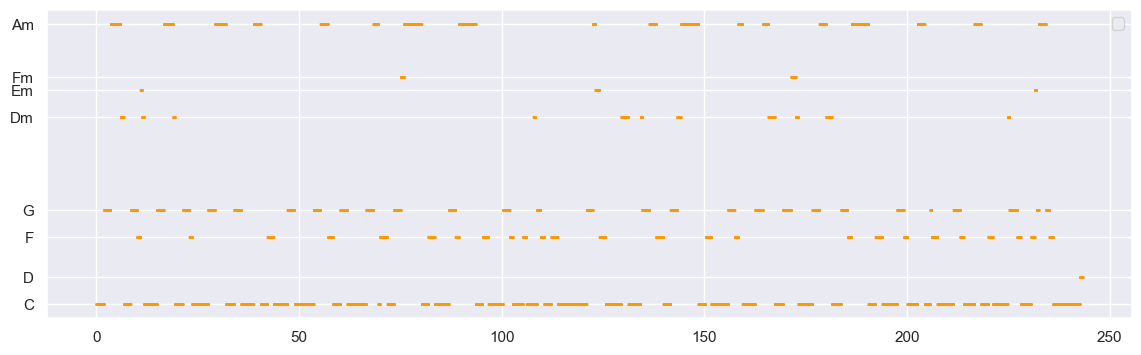

In [173]:
# And plot the results
id = 119
data = all_rs500_triads[id]
print(tracks[id])

sns.set(font_scale=1.0)
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['font.family'] = 'Andale Mono'
fontsize=20
#librosa.display.specshow(probs, x_axis='time', cmap='gray', ax=ax)
times = librosa.times_like(data)
ax.scatter(times, data, color='#ff9900', alpha=0.5, marker='o', s=1)
ax.set(yticks=np.unique(data), yticklabels=[labels[i] for i in np.unique(data)])
ax.legend()

In [8]:
all_boomy_triads = np.load('../data/all_boomy_triads.npy', allow_pickle=True)

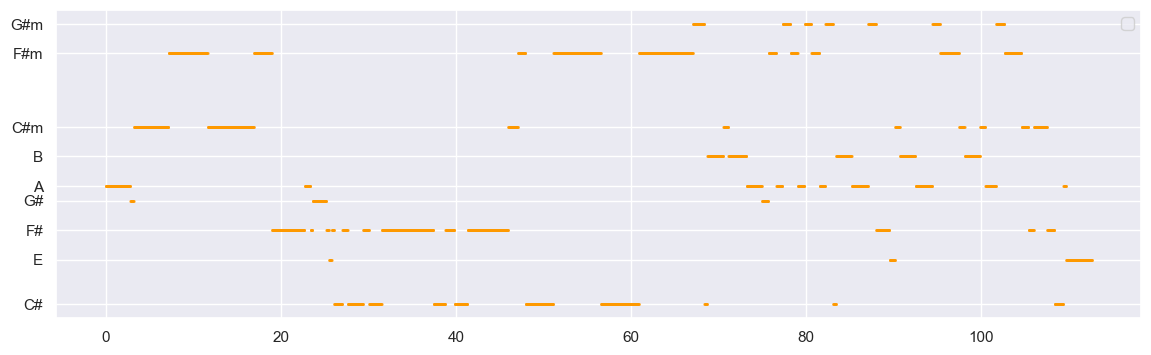

In [176]:
# And plot the results
id = 10
data = all_boomy_triads[id]


sns.set(font_scale=1.0)
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['font.family'] = 'Andale Mono'
fontsize=20
#librosa.display.specshow(probs, x_axis='time', cmap='gray', ax=ax)
times = librosa.times_like(data)
ax.scatter(times, data, color='#ff9900', alpha=0.5, marker='o', s=1)
ax.set(yticks=np.unique(data), yticklabels=[labels[i] for i in np.unique(data)])
ax.legend()

In [61]:
all_chords = []
for song in all_boomy_triads:
    for c in song:
        all_chords.append(c)

In [62]:
frec1 = {}
for c in all_chords:
    chord = labels[c]
    frec1[chord] = frec1.get(chord, 0)+1
frec1 = sorted(frec1.items(), key = lambda kv: -kv[1])


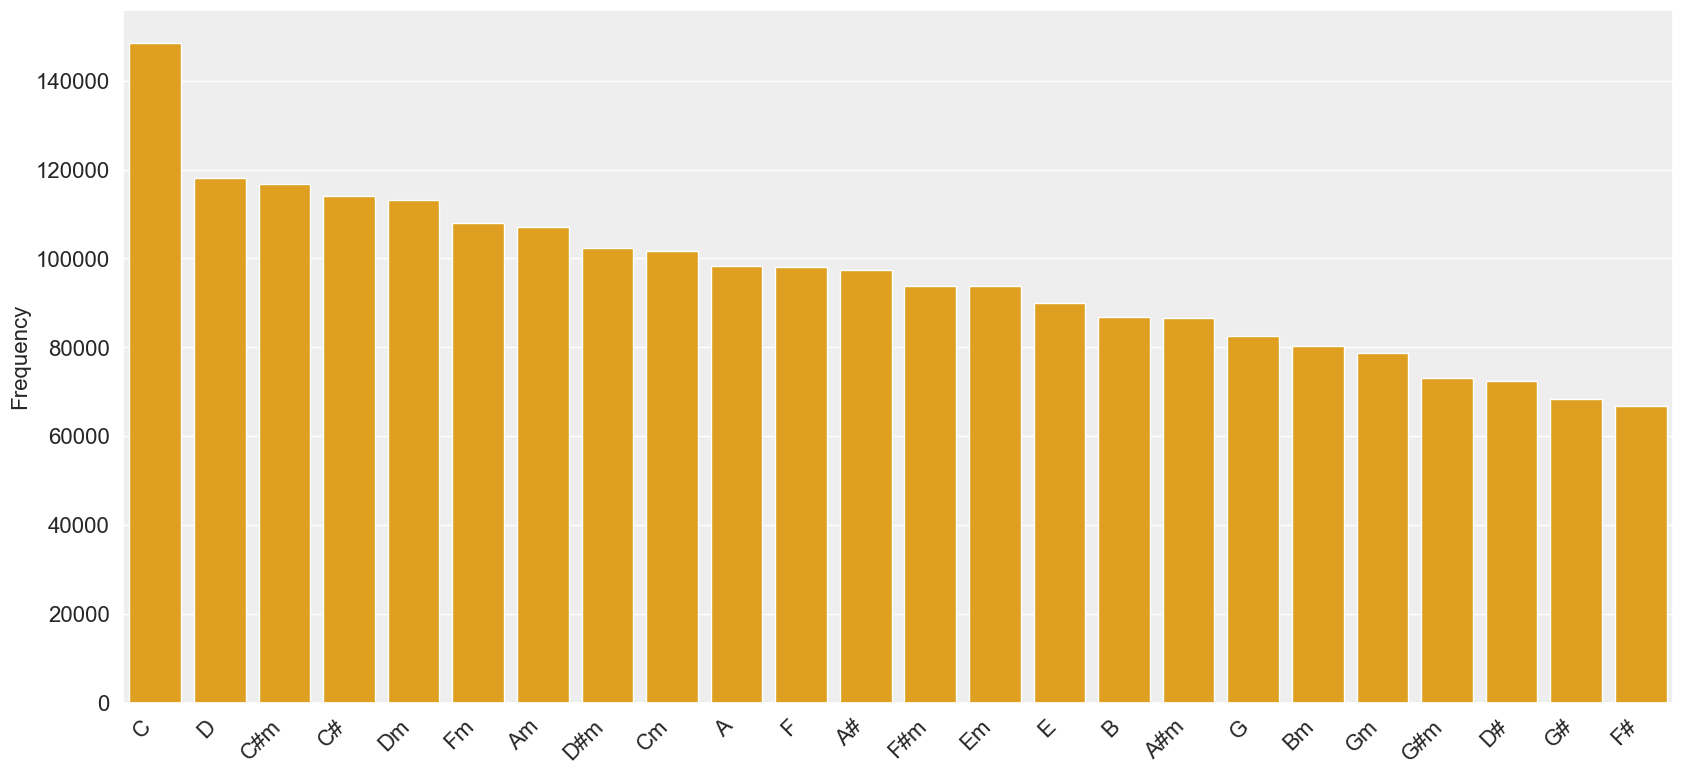

In [63]:
import seaborn as sns
x1,y1 = zip(*frec1)
x1 = np.array(x1)
y1 = np.array(y1)
sns.set(rc={'figure.figsize':(20,9)})
sns.set(font_scale=0.8)
sns.set(rc={'axes.facecolor':'#eee', 'figure.facecolor':'white'})

#with sns.axes_style("whitegrid"):
b = sns.barplot(x=x1, y=y1, color='#ffaa00') #palette="rainbow"
b.axes.set_title("",fontsize=22)
b.set_xlabel("",fontsize=16)
b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right')
b.set_ylabel("Frequency",fontsize=16)
b.tick_params(labelsize=16)
plt.show()

In [66]:
RS500_triads = np.load('../data/all_rs500_triads.npy', allow_pickle=True)

In [67]:
all_chords = []
for song in RS500_triads:
    for c in song:
        all_chords.append(c)

In [68]:
frec = {}
for c in all_chords:
    chord = labels[c]
    frec[chord] = frec.get(chord, 0)+1
frec = sorted(frec.items(), key = lambda kv: -kv[1])

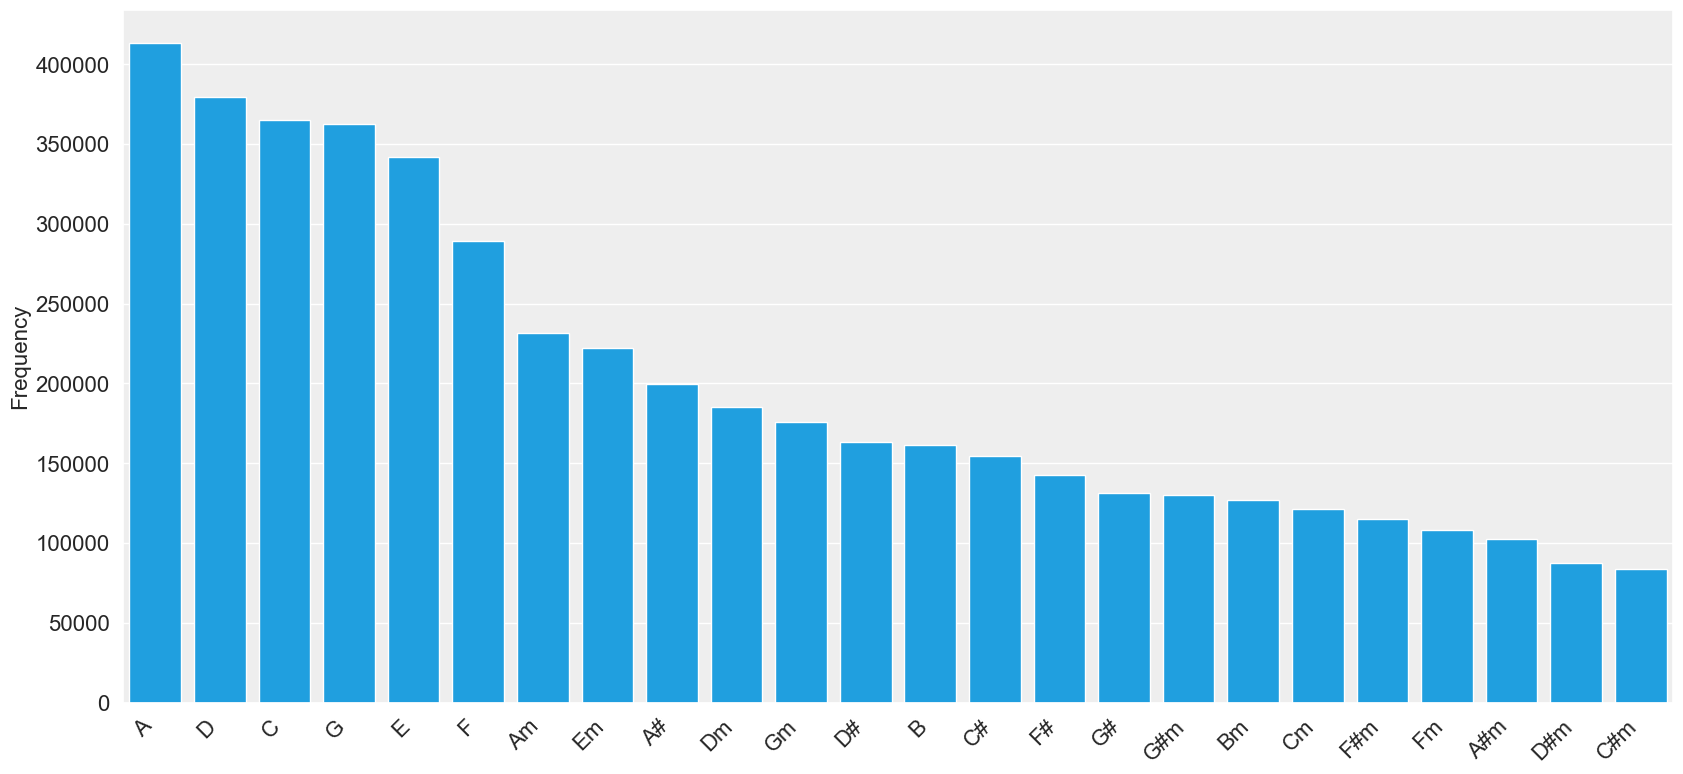

In [69]:
import seaborn as sns
x,y = zip(*frec)
x = np.array(x)
y = np.array(y)

sns.set(rc={'figure.figsize':(20,9)})
sns.set(font_scale=0.8)
sns.set(rc={'axes.facecolor':'#eee', 'figure.facecolor':'white'})

#with sns.axes_style("whitegrid"):

b = sns.barplot(x=x, y=y, color='#00aaff') #palette="rainbow"

b.axes.set_title("",fontsize=22)
b.set_xlabel("",fontsize=16)
b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right')
b.set_ylabel("Frequency",fontsize=16)
b.tick_params(labelsize=16)
plt.show()

In [140]:
import pandas as pd

df = pd.DataFrame(data=frec)
#df = df.T
#print(df)

df2 = pd.DataFrame(data=frec1)
#df2 = df2.T
#print(df2)

frames = [df, df2]

result = pd.merge(df, df2, on=0, how='outer')
result.rename(columns = {0:'Triads', '1_x':'RS500', '1_y': 'Boomy500'}, inplace = True)

#result['RS500'] = np.log10(result['RS500'])
#result['Boomy500'] = np.log10(result['Boomy500'])

result['RS500'] = np.divide(result['RS500'], 100000)
result['Boomy500'] = np.divide(result['Boomy500'], 100000)

print(result)

   Triads    RS500  Boomy500
0       A  4.13511   0.98260
1       D  3.79387   1.18187
2       C  3.64933   1.48575
3       G  3.62236   0.82617
4       E  3.41982   0.89941
5       F  2.89389   0.98170
6      Am  2.31848   1.07107
7      Em  2.22122   0.93864
8      A#  1.99712   0.97335
9      Dm  1.85008   1.13118
10     Gm  1.76130   0.78688
11     D#  1.63404   0.72478
12      B  1.61329   0.86786
13     C#  1.54591   1.13948
14     F#  1.42541   0.66676
15     G#  1.31185   0.68271
16    G#m  1.30215   0.72977
17     Bm  1.27227   0.80212
18     Cm  1.21574   1.01733
19    F#m  1.14888   0.93892
20     Fm  1.08011   1.08073
21    A#m  1.02435   0.86588
22    D#m  0.87726   1.02389
23    C#m  0.83571   1.16765


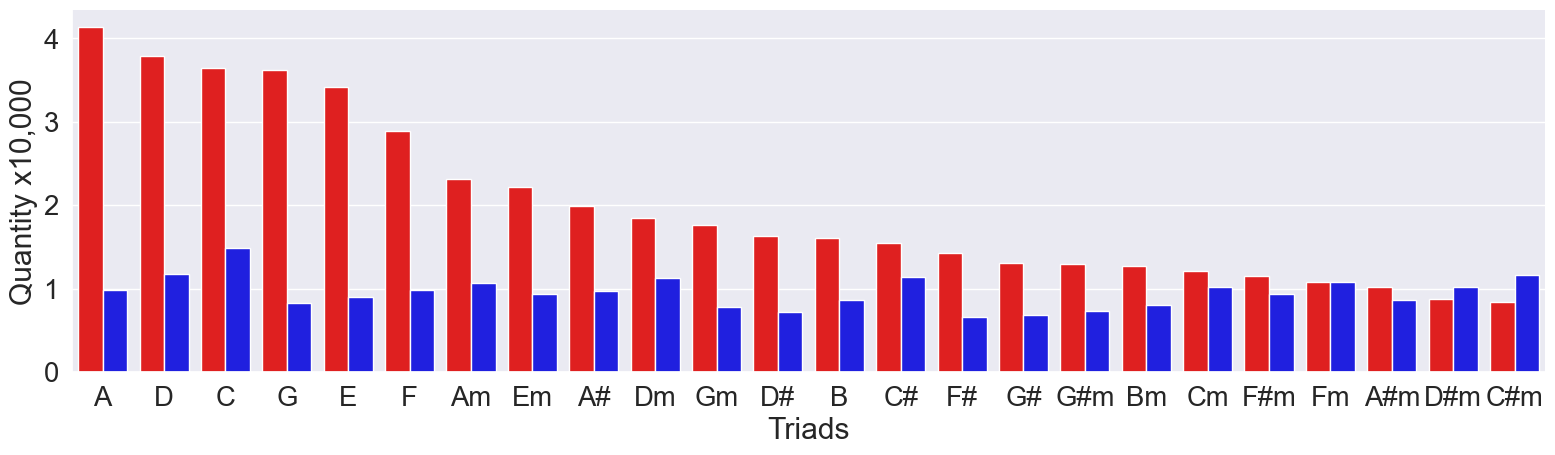

In [179]:
dfm = result.melt('Triads', var_name='Collection', value_name='Quantity x10,000')

#sns.set(rc={'figure.figsize':(10,5)})
#sns.set(rc={'axes.facecolor':'#eee', 'figure.facecolor':'white'})
sns.set(font_scale=1.8)
sns.catplot(x="Triads", y="Quantity x10,000", hue="Collection", data=dfm, kind="bar", aspect=16/5, palette=sns.color_palette(['red', 'blue']), legend=False)

#b.axes.set_title("",fontsize=1)
#b.set_xlabel("",fontsize=1)
#b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right')
#b.set_ylabel("Frequency", fontsize=16)
#b.tick_params(labelsize=1)
#plt.ylim(4.8, 5.6)
plt.show()